In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  sklearn as sk

In [2]:
df = pd.read_csv("Heart_attack.csv")

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,18,15,0,9,4,3
1,0,0,0,0,25.0,1,0,0,1,0,0,0,0,7,6,1
2,0,1,1,1,28.0,0,0,0,0,0,30,30,0,9,4,8
3,0,1,0,1,27.0,0,0,0,1,0,0,0,0,11,3,6
4,0,1,1,1,24.0,0,0,0,1,0,3,0,0,11,5,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129998 entries, 0 to 129997
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  129998 non-null  int64  
 1   HighBP                129998 non-null  int64  
 2   HighChol              129998 non-null  int64  
 3   CholCheck             129998 non-null  int64  
 4   BMI                   129988 non-null  float64
 5   Smoker                129998 non-null  int64  
 6   Stroke                129998 non-null  int64  
 7   Diabetes              129998 non-null  int64  
 8   PhysActivity          129998 non-null  int64  
 9   HvyAlcoholConsump     129998 non-null  int64  
 10  MentHlth              129998 non-null  int64  
 11  PhysHlth              129998 non-null  int64  
 12  Sex                   129998 non-null  int64  
 13  Age                   129998 non-null  int64  
 14  Education             129998 non-null  int64  
 15  

In [5]:
df['BMI'] =  df['BMI'].fillna(df['BMI'].median())

In [6]:
df['BMI'] = df['BMI'].astype(int)

In [7]:
df.describe().round(2)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,129998.00,129998.00,129998.00,129998.00,129998.00,129998.00,129998.00,129998.0,129998.00,129998.00,129998.00,129998.00,129998.00,129998.00,129998.00,129998.00
mean,0.09,0.43,0.43,0.96,28.44,0.45,0.04,0.3,0.76,0.06,3.16,4.22,0.44,8.06,5.08,6.10
std,0.29,0.50,0.49,0.19,7.00,0.50,0.20,0.7,0.43,0.23,7.34,8.69,0.50,3.05,0.98,2.06
min,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,1.00,24.00,0.00,0.00,0.0,1.00,0.00,0.00,0.00,0.00,6.00,4.00,5.00
50%,0.00,0.00,0.00,1.00,27.00,0.00,0.00,0.0,1.00,0.00,0.00,0.00,0.00,8.00,5.00,7.00
75%,0.00,1.00,1.00,1.00,31.00,1.00,0.00,0.0,1.00,0.00,2.00,3.00,1.00,10.00,6.00,8.00
max,1.00,1.00,1.00,1.00,98.00,1.00,1.00,2.0,1.00,1.00,30.00,30.00,1.00,13.00,6.00,8.00


<Axes: xlabel='MentHlth'>

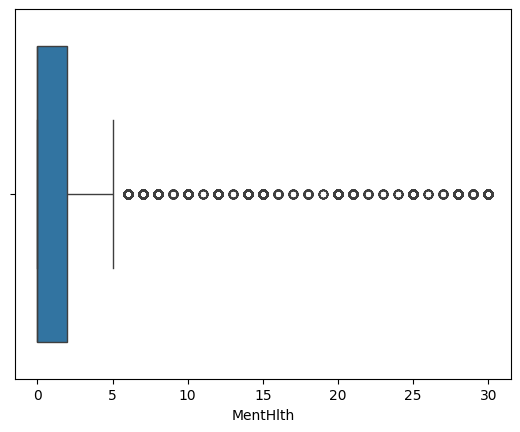

In [8]:
sns.boxplot(x=df['MentHlth'])

In [9]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,18,15,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,0,30,30,0,9,4,8
3,0,1,0,1,27,0,0,0,1,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,0,3,0,0,11,5,4


In [10]:
x = df.drop(columns='HeartDiseaseorAttack')
y = df['HeartDiseaseorAttack']

In [11]:
y.value_counts() / len(y)*100

HeartDiseaseorAttack
0    90.649087
1     9.350913
Name: count, dtype: float64

In [12]:
xtrain,xtest,ytrain,ytest = sk.model_selection.train_test_split(x,y,random_state=42)

In [13]:
scaler = sk.preprocessing.MinMaxScaler()

In [14]:
xtrain = scaler.fit_transform(xtrain)

In [15]:
xtest = scaler.transform(xtest)

In [16]:
model = sk.ensemble.RandomForestClassifier()

In [17]:
model.fit(xtrain,ytrain)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
pred = model.predict(xtest)

In [19]:
sk.metrics.accuracy_score(pred,ytest)

0.8982153846153846

In [20]:
sk.metrics.roc_curve(pred,ytest)

(array([0.        , 0.08614303, 1.        ]),
 array([0.        , 0.35706462, 1.        ]),
 array([inf,  1.,  0.]))

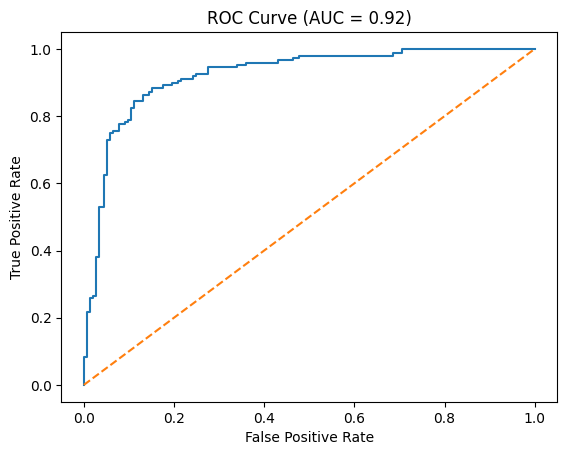

In [21]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# create sample binary classification data
X, y = make_classification(n_samples=1000, random_state=42)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# train model
model = LogisticRegression()
model.fit(X_train, y_train)

# predict probabilities (important!)
y_prob = model.predict_proba(X_test)[:, 1]

# calculate ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {auc_score:.2f})")
plt.show()


In [22]:
sk.pre

AttributeError: Module 'sklearn' has no attribute 'pre'